# Evaluación 2: Análisis Factorial Exploratorio

> Requiere cargar el archivo ["panas.sav"](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Evaluaciones/panas.sav) en el repositorio local.

En esta evaluación vamos a trabajar con los datos de validación de la escala Positive and Negative Affect Schedule (PANAS). Se trata de una medida de autoreporte que se compone de dos escalas de estado de ánimo, una que mide el afecto positivo y la otra que mide el afecto negativo. En esta oportunidad te corresponder examinar si dicha estructura factorial se mantiene a partir de los datos recogidos.  

In [ ]:
#!pip install pyreadstat
#!pip install factor_analyzer

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_spss("panas.sav")
df.drop(columns=["sex", "age", "id"], inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns.values)
scaled_df

,pn1,pn2,pn3,pn4,pn5,pn6,pn7,pn8,pn9,pn10,pn11,pn12,pn13,pn14,pn15,pn16,pn17,pn18,pn19,pn20
0,1.331962,2.057326,2.315575,0.758691,3.133728,1.271280,1.284737,2.427484,1.700669,2.963433,2.517763,1.809450,1.748485,1.422227,1.629709,1.338356,1.628897,1.611163,1.558926,2.106704
1,0.227097,2.057326,2.315575,1.663685,1.922207,-0.726776,-0.539168,-0.163561,1.700669,2.020622,1.544378,0.961515,0.739026,1.422227,-1.070536,0.332265,-1.376695,-0.434683,1.558926,2.106704
2,-1.982633,-1.304267,0.281814,-1.051299,-0.500837,-2.724832,-0.539168,-1.027242,-2.306894,-0.807813,-1.375778,-1.582289,-2.289349,0.362288,-1.070536,0.332265,-2.378559,-2.480530,-0.156487,-0.674402
3,1.331962,2.057326,1.298695,1.663685,0.710685,1.271280,1.284737,2.427484,1.700669,2.963433,2.517763,1.809450,0.739026,0.362288,1.629709,3.350536,1.628897,1.611163,0.701220,-0.674402
4,-3.087498,-1.304267,-0.735066,-1.956293,-0.500837,-2.724832,-2.363074,-0.163561,-0.303112,-0.807813,-1.375778,-1.582289,-2.289349,-0.697650,-1.970617,-0.673825,-2.378559,-2.480530,-1.014194,-0.674402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0.227097,-0.463869,1.298695,0.758691,-0.500837,0.272252,0.372784,-0.163561,0.698778,-0.807813,-0.402393,-0.734355,-0.270432,1.422227,-0.170454,-0.673825,0.627033,-0.434683,-0.156487,-0.674402
429,1.331962,-0.463869,0.281814,1.663685,-0.500837,-0.726776,0.372784,0.700121,-0.303112,0.134998,0.570993,0.113580,-0.270432,0.362288,-1.070536,-0.673825,-0.374831,0.588240,-1.014194,-0.674402
430,0.227097,-0.463869,-0.735066,0.758691,-0.500837,0.272252,0.372784,0.700121,-1.305003,-0.807813,-0.402393,-1.582289,-2.289349,-0.697650,-1.070536,-0.673825,-0.374831,-0.434683,-1.014194,-0.674402
431,0.227097,0.376529,0.281814,-0.146304,-0.500837,1.271280,1.284737,0.700121,0.698778,-0.807813,-1.375778,1.809450,1.748485,1.422227,1.629709,-0.673825,1.628897,1.611163,-1.014194,-0.674402


# Parte 1: Supuestos de un AF

Evalúa la adecuación de los datos para un análisis factorial empleando las prueba de Bartlett y el índice KMO. ¿Qué puedes concluir? (2 pts)
> Sugerencia: Utiliza las funciones `calculate_bartlett_sphericity` y `calculate_kmo` disponibles en el paquete `factor_analyzer`. 

In [3]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Escribe tu respuesta aquí
statistic, p_value = calculate_bartlett_sphericity(scaled_df)
print("Chi-squared: ", statistic)
print("p-value: ", p_value)

Chi-squared:  4038.2987878036597
p-value:  0.0


Los resultados de la prueba de Bartlett señalan la existencia de correlaciones significativas entre las variables que componen nuestros datos.

In [4]:
from factor_analyzer.factor_analyzer import calculate_kmo

# Escribe tu respuesta aquí
kmo_per_variable, kmo_total = calculate_kmo(scaled_df)

print("General MSA: ", kmo_total)
df_kmo_per_variable = pd.DataFrame(
    kmo_per_variable,
    index=scaled_df.columns.values,
    columns=["Individual MSA"],
)
df_kmo_per_variable

General MSA:  0.8748222202662335


,Individual MSA
pn1,0.923925
pn2,0.866826
pn3,0.798206
pn4,0.942446
pn5,0.819090
pn6,0.891695
pn7,0.948681
pn8,0.894392
pn9,0.928095
pn10,0.841212


Los resultados de la prueba KMO sugieren niveles adecuados de MSA a nivel global e individual. Los resultados obtenidos en esta sección sugieren la pertinencia de realizar un análisis factorial a nuestro conjunto de datos. 

# Parte 2: Número de factores a extraer

Utiliza el criterio de varianza explicada y el análisis paralelo de Horn para determinar el número de factores a extraer. ¿Qué puedes concluir? (2 pts)
> Sugerencia: Utiliza el método `get_factor_variance` de la función `FactorAnalyzer` disponible en el paquete `factor_analyzer`, y el método `parallel` de la función `fa` disponible en el paquete `Psych` del lenguaje de programación `R`.

In [29]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=scaled_df.shape[1], rotation=None)
fa.fit(scaled_df)

# Escribe tu respuesta aquí
variance, proportional_variance, cumulative_variance = fa.get_factor_variance()

df_var = pd.DataFrame(
    [variance, proportional_variance, cumulative_variance],
    index=["SS Loadings", "Proportional variance", "Cumulative variance"],
)
df_var.columns += 1
df_var = df_var.add_prefix("F")
df_var

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
SS Loadings,5.967046,3.176817,0.982028,0.792258,0.621480,0.425166,0.391444,0.350279,0.276950,0.231128,0.215668,0.136723,0.068078,0.056738,0.035052,0.026166,0.014631,0.010183,0.001669,0.000000
Proportional variance,0.298352,0.158841,0.049101,0.039613,0.031074,0.021258,0.019572,0.017514,0.013848,0.011556,0.010783,0.006836,0.003404,0.002837,0.001753,0.001308,0.000732,0.000509,0.000083,0.000000
Cumulative variance,0.298352,0.457193,0.506295,0.545907,0.576981,0.598240,0.617812,0.635326,0.649173,0.660730,0.671513,0.678349,0.681753,0.684590,0.686343,0.687651,0.688383,0.688892,0.688975,0.688975


De acuerdo al criterio de varianza explicada, deberíamos retener al menos 6 factores para explicar el 60% de la varianza de nuestros datos.

In [12]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [7]:
%%R
#install.packages(c("psych")60%

NULL


Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 


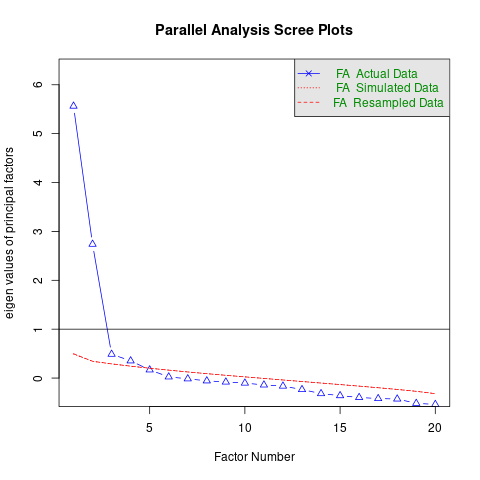

In [9]:
%%R
library(foreign)
library(psych)

# Cargamos los datos en el entorno R
dat <- read.spss("panas.sav", to.data.frame = TRUE)
dat <- subset (dat, select = -c(sex,age,id))

# Escribe tu respuesta aquí
parallel <- fa.parallel(dat, n.iter=1000, fa="fa")

El método de análisis paralelo sugiere retener 4 factores. Podemos optar por retener 4 factores, apostando por contar con una estructura factorial más simple. Conceptualmente sabemos que la escala debería contar con solo dos factores, en los pasos posteriores podremos explorar qué tanto puede sostenerse una estructura con cuatro factores. 

# Parte 3: Extracción y rotación de factores

Extrae el número de factores que determinaste en el paso anterior empleando una rotación "Varimax". (1 pts)
> Sugerencia: Utiliza la función `FactorAnalyzer` disponible en el paquete `factor_analyzer`. 

In [36]:
# Escribe tu respuesta aquí
fa = FactorAnalyzer(n_factors=4, rotation="varimax")
fa.fit(scaled_df)

loadings = pd.DataFrame(fa.loadings_, index=scaled_df.columns)
print("Cargas Factoriales:")
loadings.columns += 1
loadings = loadings.add_prefix("F")
loadings

Cargas Factoriales:


,F1,F2,F3,F4
pn1,0.654018,-0.055014,-0.126742,-0.033768
pn2,-0.150546,0.365304,0.570205,0.098704
pn3,-0.115540,0.823376,0.172851,0.127197
pn4,0.487857,-0.046699,-0.099301,-0.080228
pn5,-0.115317,0.165288,0.210781,0.639221
pn6,0.557981,-0.056011,0.100357,-0.061443
pn7,0.589028,-0.207526,-0.078421,-0.206490
pn8,-0.158662,0.408169,0.536704,0.148164
pn9,0.617557,-0.136260,-0.044285,-0.147885
pn10,-0.010375,0.085541,0.687379,0.166859


# Parte 4: Interpretación de factores

Examina la signifcancia de las cargas factoriales, la razón de cargas factoriales al cuadrado y las comunalidades de la estructura factorial que definiste en el paso anterior. Interpreta los resultados obtenidos para cada uno de estos indicadores. (4 pts)

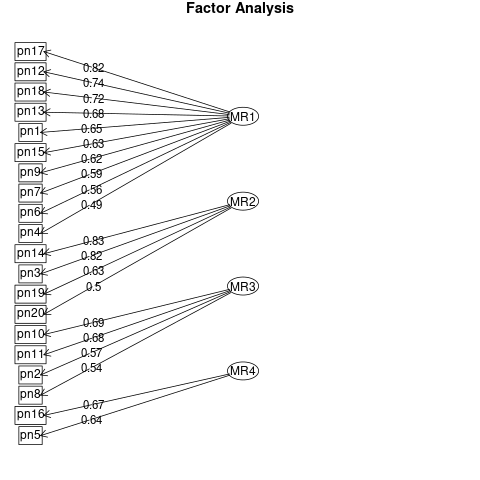

In [17]:
%%R

# Extrae los factores
fit <- fa(dat, nfactors=4,rotate="varimax")

# Genera gráfico de la estructura factorial
structure <- fa.diagram(fit, digits=2, cut=.3)

Considerando un punto de corte de .3, podemos encontrar que todas las cargas factoriales encuentran significancia estadística. 

In [37]:
def cross_loading_eval(ratio):
    if ratio < 1.5:
        return "Problematic"
    elif ratio < 2:
        return "Potential"
    else:
        return "Ignorable"


# Escribe tu respuesta aquí
squared_loadings = pd.DataFrame(fa.loadings_**2, index=scaled_df.columns)
squared_loadings.columns += 1
squared_loadings = squared_loadings.add_prefix("F")
squared_loadings["Ratio"] = squared_loadings.apply(
    lambda x: x.nlargest(2).values[0] / x.nlargest(2).values[1], axis=1
)
squared_loadings["Classification"] = squared_loadings["Ratio"].apply(
    cross_loading_eval
)
print("Cargas Factoriales al cuadrado:")
squared_loadings

Cargas Factoriales al cuadrado:


,F1,F2,F3,F4,Ratio,Classification
pn1,0.427740,0.003027,0.016064,0.001140,26.627863,Ignorable
pn2,0.022664,0.133447,0.325133,0.009743,2.436425,Ignorable
pn3,0.013350,0.677949,0.029878,0.016179,22.690844,Ignorable
pn4,0.238004,0.002181,0.009861,0.006437,24.136468,Ignorable
pn5,0.013298,0.027320,0.044428,0.408603,9.196868,Ignorable
pn6,0.311343,0.003137,0.010071,0.003775,30.913281,Ignorable
pn7,0.346954,0.043067,0.006150,0.042638,8.056155,Ignorable
pn8,0.025174,0.166602,0.288051,0.021953,1.728983,Potential
pn9,0.381377,0.018567,0.001961,0.021870,17.438459,Ignorable
pn10,0.000108,0.007317,0.472490,0.027842,16.970353,Ignorable


Puede apreciarse que la variable `pn20` es clasificada como problemática debido a sus cargas factoriales cruzadas. Las variables `pn19` y `pn8` pueden tomarse como potencialmente problemáticas.

In [38]:
communalities = pd.DataFrame(
    fa.get_communalities(),
    index=scaled_df.columns.values,
    columns=["Communalities"],
)
communalities

,Communalities
pn1,0.447970
pn2,0.490987
pn3,0.737355
pn4,0.256482
pn5,0.493650
pn6,0.328327
pn7,0.438809
pn8,0.501779
pn9,0.423774
pn10,0.507757


Puede observarse que las variables `pn1`, `pn2`, `pn4`, `pn5`, `pn6`, `pn7`, `pn9`, `pn13`, `pn15` y `pn20` presentan comunalidades inaceptables. 

4. En función a tus observaciones, re-especifica el modelo en caso sea necesario. Justifica tu respuesta. (2 pts)

In [51]:
problematic_vars = [
    "pn1",
    "pn2",
    "pn4",
    "pn5",
    "pn6",
    "pn7",
    "pn9",
    "pn13",
    "pn15",
    "pn20",
]
new_df = scaled_df.drop(columns=problematic_vars)
new_df

,pn3,pn8,pn10,pn11,pn12,pn14,pn16,pn17,pn18,pn19
0,2.315575,2.427484,2.963433,2.517763,1.809450,1.422227,1.338356,1.628897,1.611163,1.558926
1,2.315575,-0.163561,2.020622,1.544378,0.961515,1.422227,0.332265,-1.376695,-0.434683,1.558926
2,0.281814,-1.027242,-0.807813,-1.375778,-1.582289,0.362288,0.332265,-2.378559,-2.480530,-0.156487
3,1.298695,2.427484,2.963433,2.517763,1.809450,0.362288,3.350536,1.628897,1.611163,0.701220
4,-0.735066,-0.163561,-0.807813,-1.375778,-1.582289,-0.697650,-0.673825,-2.378559,-2.480530,-1.014194
...,...,...,...,...,...,...,...,...,...,...
428,1.298695,-0.163561,-0.807813,-0.402393,-0.734355,1.422227,-0.673825,0.627033,-0.434683,-0.156487
429,0.281814,0.700121,0.134998,0.570993,0.113580,0.362288,-0.673825,-0.374831,0.588240,-1.014194
430,-0.735066,0.700121,-0.807813,-0.402393,-1.582289,-0.697650,-0.673825,-0.374831,-0.434683,-1.014194
431,0.281814,0.700121,-0.807813,-1.375778,1.809450,1.422227,-0.673825,1.628897,1.611163,-1.014194


In [52]:
re_fa = FactorAnalyzer(n_factors=2, rotation="varimax")
re_fa.fit(new_df)

loadings = pd.DataFrame(re_fa.loadings_, index=new_df.columns)
print("Cargas Factoriales:")
loadings.columns += 1
loadings = loadings.add_prefix("F")
loadings

Cargas Factoriales:


,F1,F2
pn3,0.747528,-0.105247
pn8,0.651826,-0.183823
pn10,0.499176,-0.058454
pn11,0.558827,-0.151538
pn12,-0.062457,0.709398
pn14,0.770307,-0.092921
pn16,0.502300,-0.098507
pn17,-0.123573,0.871410
pn18,-0.149791,0.682147
pn19,0.722671,-0.047760


En función de las observaciones reportadas en el paso anterior, se opta por eliminar las variables con razón de cargas al cuadrado problemáticas o comunalidades inaceptables. Luego, se apuesta por una estructura factorial más simple. Se opta por una estructura de dos factores debido al conocimiento conceptual que tenemos sobre esta escala. 

5. Define una estructura factorial sugerida creando una variable `factor_index`. Describe la estructura factorial propuesta, considerando sus fortalezas y debilidades. (1 pts)

In [23]:
# Escribe tu respuesta aquí
factor_index = {
    "F1": ["pn3", "pn8", "pn10", "pn11", "pn14", "pn16", "pn19"],
    "F2": ["pn12", "pn17", "pn18"],
}

factor_index

{'F1': ['pn3', 'pn8', 'pn10', 'pn11', 'pn14', 'pn16', 'pn19'],
 'F2': ['pn12', 'pn17', 'pn18']}

In [53]:
squared_loadings = pd.DataFrame(re_fa.loadings_**2, index=new_df.columns)
squared_loadings.columns += 1
squared_loadings = squared_loadings.add_prefix("F")
squared_loadings["Ratio"] = squared_loadings.apply(
    lambda x: x.nlargest(2).values[0] / x.nlargest(2).values[1], axis=1
)
squared_loadings["Classification"] = squared_loadings["Ratio"].apply(
    cross_loading_eval
)
print("Cargas Factoriales al cuadrado:")
squared_loadings

Cargas Factoriales al cuadrado:


,F1,F2,Ratio,Classification
pn3,0.558798,0.011077,50.447120,Ignorable
pn8,0.424877,0.033791,12.573744,Ignorable
pn10,0.249177,0.003417,72.926290,Ignorable
pn11,0.312288,0.022964,13.599179,Ignorable
pn12,0.003901,0.503245,129.009187,Ignorable
pn14,0.593373,0.008634,68.721967,Ignorable
pn16,0.252306,0.009704,26.000942,Ignorable
pn17,0.015270,0.759355,49.727350,Ignorable
pn18,0.022437,0.465324,20.738868,Ignorable
pn19,0.522254,0.002281,228.960214,Ignorable


In [54]:
communalities = pd.DataFrame(
    re_fa.get_communalities(),
    index=new_df.columns.values,
    columns=["Communalities"],
)
communalities

,Communalities
pn3,0.569875
pn8,0.458668
pn10,0.252594
pn11,0.335251
pn12,0.507146
pn14,0.602007
pn16,0.262009
pn17,0.774625
pn18,0.487761
pn19,0.524535


La estructura de dos factores sugerida tiene la fortaleza de contar con cargas cruzadas ignorables y cargas factoriales estadísticamente significativas en todas las variables. Sin embargo, todavía se cuenta con valores de comunialidades inaceptables para las variables `pn8`, `pn10`, `pn11`, `pn16` y `pn18`.

La principal debilidad de la estructura factorial propuesta es que no representa la totalidad de la información concebida al momento de elaborar la escala psicométrica, puesto que se elimió la mitad de los ítems disponibles para llegar a ella. Cabe mencionar, sin embargo, que no haberlos eliminado suponía preserver items que no podían ser explicados por los factores extraídos (comunalidades inaceptables).  

Nos encontramos frente a un caso en el que no es posible replicar la estructura factorial concebida originalmente por la prueba PANAS. Es posible que tenga que revisarse la manera en que están formulados los items y considerar cuestiones relacionadas a la manera en que fue recogida la muestra y la población.